<a href="https://colab.research.google.com/github/Yslhna/Diplom/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_16_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание набора данных

Исходные данные: отчет о доходах рекламной площадки в разрезе географического распределения пользователей рекламных материалов. В отчете используются группировки, аналогичные территориальному делению:

*   Страна;
*   область (административная единица);
*   город.

В отчете отображены следующие метрики:

> Визиты - суммарное количество уникальных посетителей.

> Отказы - доля визитов, в рамках которых лишь 1 просмотр страницы, продолжавшийся менее 15 сек (чем выше показатель отказов, тем меньше сайт вовлекает посетителей — они уходят в течение 15 секунд, просмотрев только одну страницу)

> CPMV (Cost per mille viewable ads) - стоимость 1 тыс. показов рекламных блоков, руб. без НДС (=  ARPU х Посетители х Показы х 1000)

> ARPU (Average revenue per user) - средний доход на одного посетителя сайта, руб. без НДС

> Расчетный доход - ориентировочная стоимость показов рекламы, состоявшихся в выбранном периоде отчета, руб. без НДС (= ARPU х Посетители)


> Показ - отображение рекламного блока



























# Загрузка и обработка данных

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Датасет Солохина Ю.В..csv')
from sklearn.cluster import KMeans

Уже по пяти первым строкам датасета очевидно, что в данных присутствуют значения NAN и значения "Не определено". Строки с неопределенными статистическими даннами необходимо будет скорректировать.

In [ ]:
data.head()

,Страна,Область,Город,Визиты,Посетители,Отказы,CPMV,ARPU,Расчетный доход,Показы
0,Итого и средние,NaN,NaN,4092007,3412232,0.204393,246.912142,0.288261,983614.025381,3983660
1,Россия,Москва и Московская область,Москва,785353,723479,0.165307,483.201144,0.427125,309016.312556,639519
2,Россия,Не определено,Не определено,667277,598525,0.192076,228.070455,0.193744,115960.826588,508443
3,Россия,Санкт-Петербург и Ленинградская область,Санкт-Петербург,276082,228346,0.239769,240.710072,0.333228,76091.342312,316112
4,Россия,Москва и Московская область,Не определено,119314,106793,0.214878,237.424456,0.262373,28019.647190,118015


Для более удобной работы заменим названия столбцов

In [ ]:
data.columns.tolist()

['Страна',
 'Область',
 'Город',
 'Визиты',
 'Посетители',
 'Отказы',
 'CPMV',
 'ARPU',
 'Расчетный доход',
 'Показы']

In [ ]:
data.columns=['Country',
 'Region',
 'City',
 'Visits',
 'Unique users',
 'Refusal',
 'CPMV',
 'ARPU',
 'Income',
 'Display']

In [ ]:
data.columns.tolist()

['Country',
 'Region',
 'City',
 'Visits',
 'Unique users',
 'Refusal',
 'CPMV',
 'ARPU',
 'Income',
 'Display']

Посчитаем количество пустых значений в датасете. Всего 6 значений - одно в столбце с наименованием региона, одно - в столбце "City" и четыре - в CPMV. Перед обработкой этих значений проведем преобразование датасета, возможно, эти значения сами уйдут

In [ ]:
data.isnull().sum()

Country         0
Region          1
City            1
Visits          0
Unique users    0
Refusal         0
CPMV            4
ARPU            0
Income          0
Display         0
dtype: int64

Нам необходимо из имеющихся данных выделить лишь те, которые относятся к Российской Федерации. Для этого посмотрим какие страны вообще представлены в датасете

In [ ]:
data['Country'].unique()

array(['Итого и средние', 'Россия', 'Украина', 'Германия', 'Беларусь',
       'Казахстан', 'Финляндия', 'США', 'Великобритания', 'Франция',
       'Нидерланды', 'Чехия', 'Узбекистан', 'Швеция', 'Польша',
       'Киргизия', 'Армения', 'Эстония', 'Таджикистан', 'Азербайджан',
       'Молдова', 'Грузия', 'Латвия', 'Турция', 'Китай', 'Литва',
       'Сингапур', 'Италия', 'Монголия', 'Австрия', 'Бельгия', 'Япония',
       'Болгария', 'Швейцария', 'Туркменистан', 'Сербия', 'Испания',
       'Объединённые Арабские Эмираты', 'Румыния', 'Израиль', 'Норвегия',
       'Канада', 'Таиланд', 'Южная Корея', 'Венгрия', 'Ирландия',
       'Люксембург', 'Словакия', 'Мексика', 'Греция', 'Египет', 'Вьетнам',
       'Бангладеш', 'Австралия', 'Дания', 'Индия', 'Тайвань', 'Кипр',
       'Иран', 'Португалия', 'Аргентина', 'Сирия', 'Иордания',
       'Черногория', 'Бразилия', 'Индонезия', 'Абхазия', 'Словения',
       'Хорватия', 'Шри-Ланка', 'Саудовская Аравия', 'Мали', 'ЮАР',
       'Малайзия', 'Албания', 'А

Сделаем выборку по стране

In [ ]:
data_rf=data[data['Country']=='Россия']


In [ ]:
data_rf

,Country,Region,City,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
1,Россия,Москва и Московская область,Москва,785353,723479,0.165307,483.201144,0.427125,309016.312556,639519
2,Россия,Не определено,Не определено,667277,598525,0.192076,228.070455,0.193744,115960.826588,508443
3,Россия,Санкт-Петербург и Ленинградская область,Санкт-Петербург,276082,228346,0.239769,240.710072,0.333228,76091.342312,316112
4,Россия,Москва и Московская область,Не определено,119314,106793,0.214878,237.424456,0.262373,28019.647190,118015
5,Россия,Свердловская область,Екатеринбург,89533,69406,0.232506,201.325883,0.330523,22940.279070,113946
...,...,...,...,...,...,...,...,...,...,...
1365,Россия,Псковская область,Пустошка,12,11,0.416667,109.547500,0.059753,0.657285,6
1366,Россия,Свердловская область,Волчанск,12,12,0.333333,190.554333,0.238193,2.858315,15
1367,Россия,Ярославская область,Любим,12,11,0.416667,103.226500,0.056305,0.619359,6
1368,Россия,Костромская область,Волгореченск,11,10,0.090909,93.859750,0.112632,1.126317,12


Для анализа данных в разрезе регионов необходимо удалить строки с неопределенными регионами

In [ ]:
data_rf[data_rf['Region'] == 'Не определено']

,Country,Region,City,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
2,Россия,Не определено,Не определено,667277,598525,0.192076,228.070455,0.193744,115960.826588,508443


In [ ]:
data_rf=data_rf[data_rf['Region']!= 'Не определено']

Сгруппируем данные по стоблцу Region. Для адекватного подсчета значений по каждому столбцу возьмем усредненные значения каждого региона

In [ ]:
data_group=data_rf.groupby('Region').mean()
data_group


<ipython-input-94-68a13427020d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group=data_rf.groupby('Region').mean()


,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
Region,,,,,,,
Алтайский край,1702.846154,1408.000000,0.188925,178.407155,0.273900,345.795789,2112.307692
Амурская область,639.666667,532.444444,0.195712,164.552330,0.282528,160.707014,847.888889
Архангельская область,801.100000,675.700000,0.244383,127.719278,0.154358,138.086709,921.300000
Астраханская область,2470.333333,2041.333333,0.260702,160.211366,0.188504,516.809374,2985.333333
Белгородская область,2003.222222,1642.333333,0.269188,148.659317,0.194466,373.735592,2385.666667
...,...,...,...,...,...,...,...
Чеченская Республика,1287.000000,1159.666667,0.205924,231.943743,0.312208,324.578392,1315.333333
Чувашская Республика,1563.500000,1263.500000,0.266159,159.791737,0.310581,305.119693,1770.000000
Чукотский автономный округ,90.000000,76.250000,0.092837,279.108216,0.583775,36.836350,142.500000


Проверим наличие неопределенных значений после проведенных преобразований

In [ ]:
data_group.isnull().sum()

Visits          0
Unique users    0
Refusal         0
CPMV            0
ARPU            0
Income          0
Display         0
dtype: int64

# Задачи исследования

В рамках данной работы выделены следующие задачи:
1. Определение наиболее прибыльных регионов с точки зрения общего расчетного дохода (например, топ 15).
2. Кластеризация регионов по показателям (Доход на одного посетителя) "ARPU" и "Отказы"
3. Анализ полученных кластеров для дальнешей коррекции стратегии в регионах с низкими показателями дохода ARPU и высокой долей отказов.

Определим лидеров по показателю "Расчетный доход", построим диаграмму и проанализируем полученные данные

In [ ]:
to_plot = pd.DataFrame(data_group['Income'].nlargest(n=15))
to_plot


,Income
Region,
Москва и Московская область,5046.804136
Санкт-Петербург и Ленинградская область,2725.893396
Омская область,1754.856290
Новосибирская область,1564.221621
Самарская область,1411.473907
Тюменская область,1246.824144
Краснодарский край,1196.262897
Хабаровский край,951.176248
Республика Крым,908.792845


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

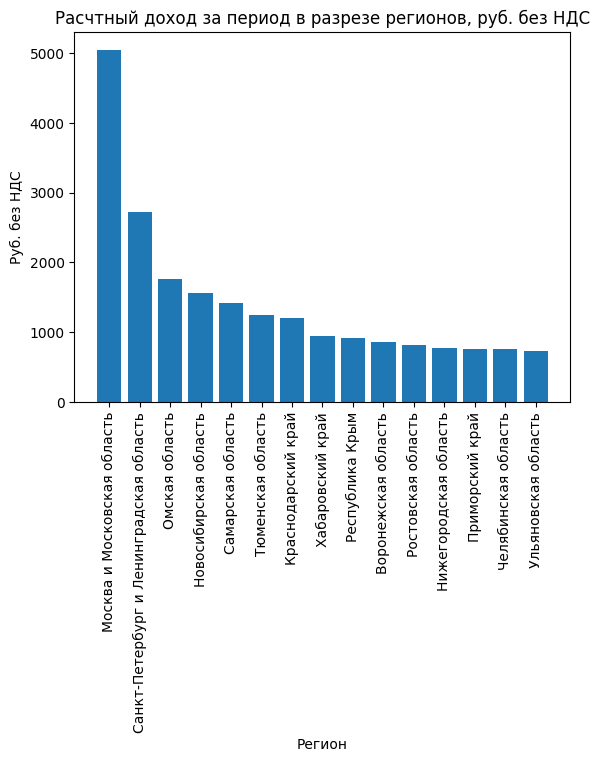

In [ ]:
plt.bar(to_plot.index, to_plot['Income'],width=0.8)
plt.xticks(rotation = 'vertical')
plt.title('Расчтный доход за период в разрезе регионов, руб. без НДС')
plt.xlabel('Регион')
plt.ylabel('Руб. без НДС')
plt.show

Москва и Московская область, а также Санкт-Петербург и ЛО находятся в лидерах, с большим преимуществом, в оновном, благодаря количеству посетителей. Соответственно регионы с меньшей численностью населения будут проигрывать. В данном случае параметр "Расчетный доход" не показателен. Далее будем строитьт анализ по удельному показателю дохода и проценту отказов.

Сделаем выборку по данным столбцам и построим статистическую диаграмму. Нормировка данных не требуется

<Axes: >

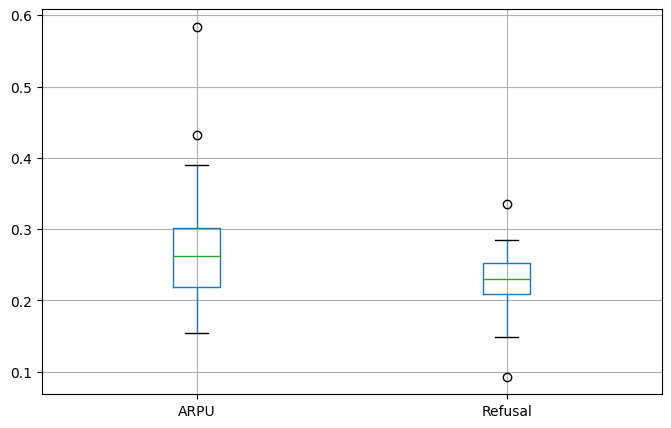

In [ ]:
data_group.boxplot(column =['ARPU','Refusal'],figsize=(8,5))

На графике видно некоторое количество выбросов, но мы с ними ничего не будем делать, так как по заданию нам как раз необходимо выявить группу отстающих регионов. Но посмотрим на выбивающиеся значения

In [ ]:
data_group.loc[data_group['ARPU']>0.4]


,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
Region,,,,,,,
Магаданская область,516.5,439.50,0.195879,266.571710,0.431843,265.531759,718.5
Чукотский автономный округ,90.0,76.25,0.092837,279.108216,0.583775,36.836350,142.5


In [ ]:
data_group.loc[data_group['Refusal']>0.3]

,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
Region,,,,,,,
Республика Ингушетия,172.25,148.5,0.334651,176.343475,0.209557,39.608971,187.75


In [ ]:
data_group.loc[data_group['Refusal']<0.1]

,Visits,Unique users,Refusal,CPMV,ARPU,Income,Display
Region,,,,,,,
Чукотский автономный округ,90.0,76.25,0.092837,279.108216,0.583775,36.83635,142.5


Сделаем финальную выборку для кластеризации методом  k-means, выберем число кластеров от 1 до 10

In [ ]:
final_df = data_group[['ARPU','Refusal']].copy()
final_df

,ARPU,Refusal
Region,,
Алтайский край,0.273900,0.188925
Амурская область,0.282528,0.195712
Архангельская область,0.154358,0.244383
Астраханская область,0.188504,0.260702
Белгородская область,0.194466,0.269188
...,...,...
Чеченская Республика,0.312208,0.205924
Чувашская Республика,0.310581,0.266159
Чукотский автономный округ,0.583775,0.092837


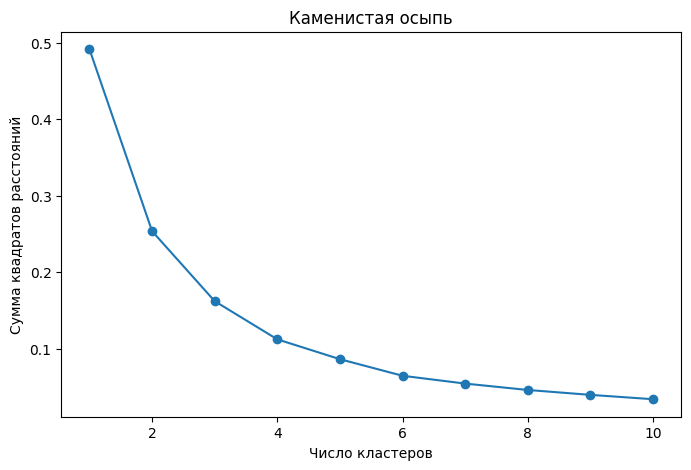

In [ ]:
K = range(1,11)
models = [KMeans(n_clusters= k, random_state = 111,n_init = 100, max_iter = 10000).fit(final_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(8,5))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()


<ipython-input-109-c2501f09495e>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())


                ARPU   Refusal
4_clusters                    
0           0.294913  0.252027
1           0.216005  0.232518
2           0.308065  0.223978
3           0.268013  0.222308


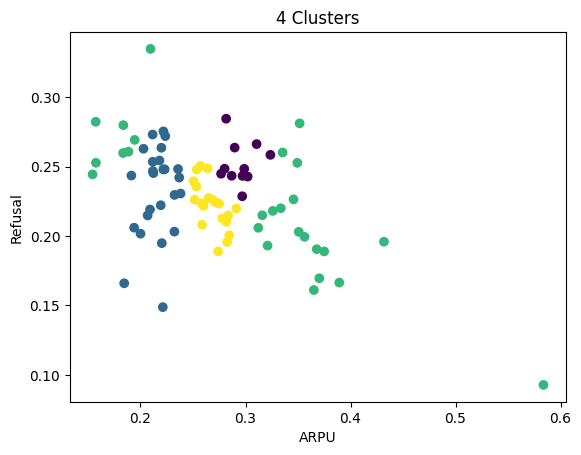

<ipython-input-109-c2501f09495e>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())


                ARPU   Refusal
5_clusters                    
0           0.268013  0.222308
1           0.216005  0.232518
2           0.334149  0.227526
3           0.294913  0.252027
4           0.291763  0.221761


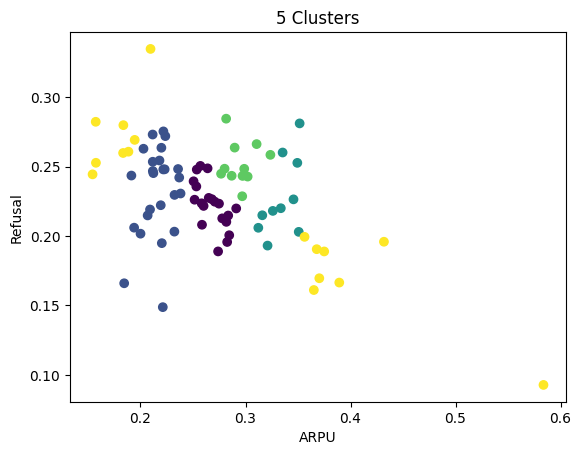

<ipython-input-109-c2501f09495e>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())


                ARPU   Refusal
6_clusters                    
0           0.268013  0.222308
1           0.216005  0.232518
2           0.404910  0.170599
3           0.334149  0.227526
4           0.294913  0.252027
5           0.178616  0.272924


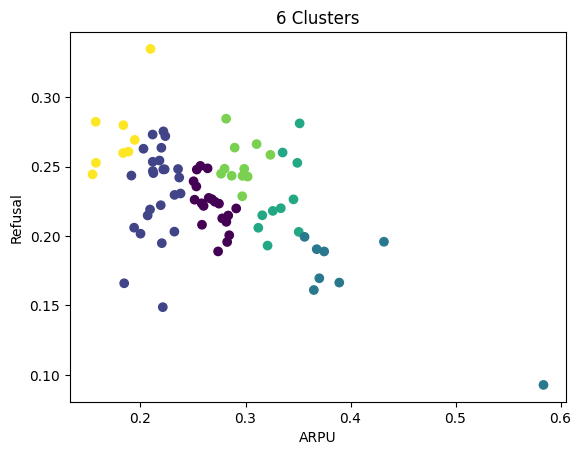

<ipython-input-109-c2501f09495e>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())


                ARPU   Refusal
7_clusters                    
0           0.268013  0.222308
1           0.334149  0.227526
2           0.217300  0.255440
3           0.404910  0.170599
4           0.294913  0.252027
5           0.178616  0.272924
6           0.214357  0.203345


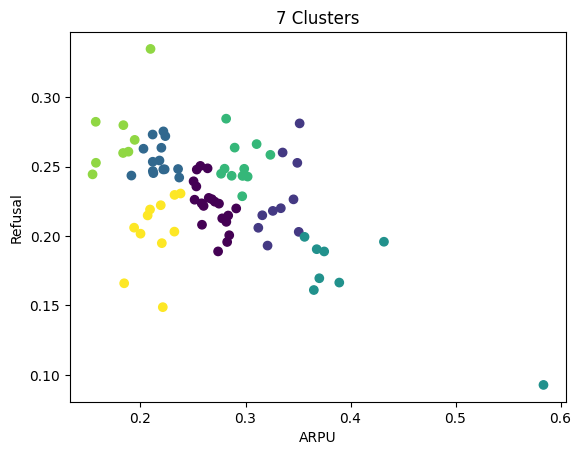

<ipython-input-109-c2501f09495e>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())


                ARPU   Refusal
8_clusters                    
0           0.268013  0.222308
1           0.294913  0.252027
2           0.217300  0.255440
3           0.214357  0.203345
4           0.334149  0.227526
5           0.379358  0.181707
6           0.178616  0.272924
7           0.583775  0.092837


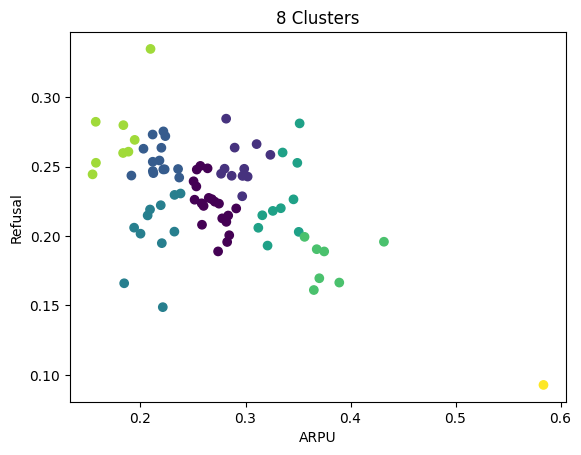

In [ ]:
for i in range(4,9):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(final_df)

  final_df[f'{i}_clusters'] = model.labels_

  print(final_df.groupby(f'{i}_clusters')['ARPU','Refusal'].mean())

  plt.scatter(final_df['ARPU'],final_df['Refusal'], c = final_df[f'{i}_clusters'])
  plt.xlabel('ARPU')
  plt.ylabel('Refusal')
  plt.title(f'{i} Clusters')
  plt.show()


Для целей настоящего анализа, а именно, выявления "отстающего" кластера, подходящим может оказаться разбиение на 6 кластеров, где ARPU - 0.178616, Refusal - 0.272924, так как при дальнейшем разбиении параметры "отстающего" кластера перестают меняться.